In [2]:
library(deSolve) # for solving ODE system
library(ggplot2) # for visualisation
library(scales) # y axis values scaling

# SI model
# basic setup 
N   <- 100 
I_0 <- 1
S_0 <- N - I_0
y   <- c(S = S_0, I = I_0)

times  <- seq(from = 0, to = 50, by = 1)  # time step 
params <- c(beta = 0.4)

si_model <- function(times, state, parms)
    {
    S <- state["S"]
    I <- state["I"]
    R <- state["R"]
    N <- S + I
    beta <- parms["beta"]
    dS <- - (beta * I / N) * S
    dI <- (beta * I / N) * S
    res <- list(c(dS, dI))
    return(res)
    }

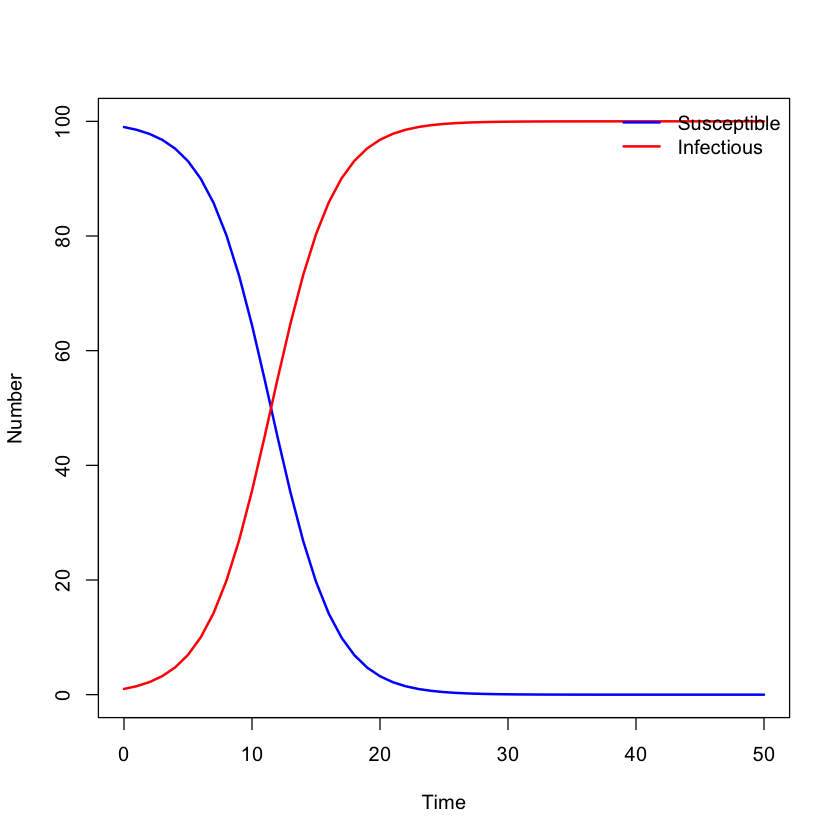

In [3]:
# solve equations
output_raw <- ode(y = y, times = times, func = si_model, parms = params)

# convert matrix to dataframe
output <- as.data.frame(output_raw)

# plot (without using ggplot2)
plot(output$time, output$S, type = "l", col = "blue", lwd = 2, ylim = c(0, N),
     xlab = "Time", ylab = "Number")
lines(output$time, output$I, lwd = 2, col = "red", type = "l")
legend("topright", legend = c("Susceptible", "Infectious"),
       col = c("blue", "red"), lwd = 2, bty = "n")

In [4]:
# SIR model function
sir_model <- function(time, state, parameters) {
  with(as.list(c(state, parameters)), {
    dS <- -beta * S * I / N
    dI <- beta * S * I / N - gamma * I
    dR <- gamma * I
    return(list(c(dS, dI, dR)))
  })
}

In [5]:
# Set parameters
parameters <- c(beta = 0.5, gamma = 0.1)
state <- c(S = 99000, I = 1000, R = 0)
times <- seq(0, 180, by = 1)
N <- sum(state)

In [6]:
# Solve the differential equations
out <- ode(y = state, times = times, func = sir_model, parms = parameters)
df <- as.data.frame(out)

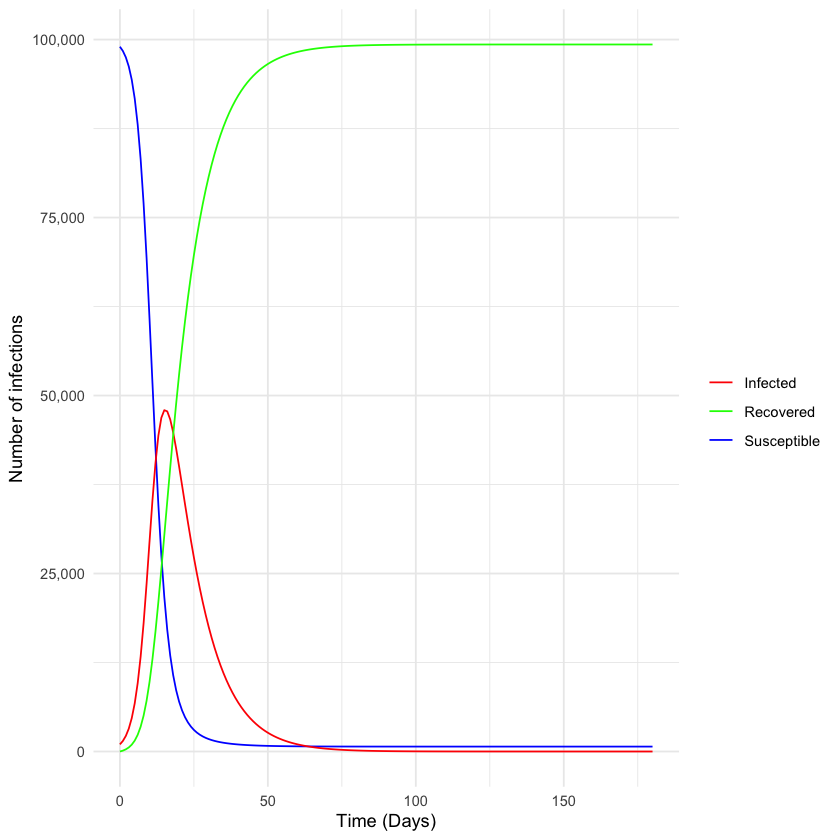

In [7]:
# Plot
ggplot(df, aes(x = time)) +
  geom_line(aes(y = S, color = "Susceptible")) +
  geom_line(aes(y = I, color = "Infected")) +
  geom_line(aes(y = R, color = "Recovered")) +
  scale_color_manual(values = c("Susceptible" = "blue", "Infected" = "red", "Recovered" = "green")) +
  labs(x = "Time (Days)", y = "Number of infections", color = "") +
  theme_minimal() +
  theme(legend.position = "right")+
  scale_y_continuous(labels = comma)

In [8]:
# seir model 
# define the model fucntion first 
seir_model <- function(times, state, parms)
    {
    S <- state["S"]
    E <- state["E"]
    I <- state["I"]
    R <- state["R"]
    N <- S + E + I + R

    beta  <- parms["beta"]
    delta <- parms["delta"]
    gamma <- parms["gamma"]

    dS  <- -(beta * I / N) * S
    dE  <- (beta * I / N) * S - delta * E
    dI  <- delta * E - gamma * I
    dR  <- gamma * I
    res <- list(c(dS, dE, dI, dR))
    return (res)
}

# define params
parms <- c(beta = 0.4, delta = 0.2, gamma = 0.2)

# define times
times <- seq(from = 0, to = 100, by = 1)

# Define initial conditions
N <- 100
E_0 <- 0
I_0 <- 1
R_0 <- 0
S_0 <- N - E_0 - I_0 - R_0
y <- c(S = S_0, E = E_0, I = I_0, R = R_0)

# Solve equations
output_raw <- ode(y = y, times = times, func = seir_model, parms = parms)

# Convert matrix to data frame for easier manipulation
output <- as.data.frame(output_raw)

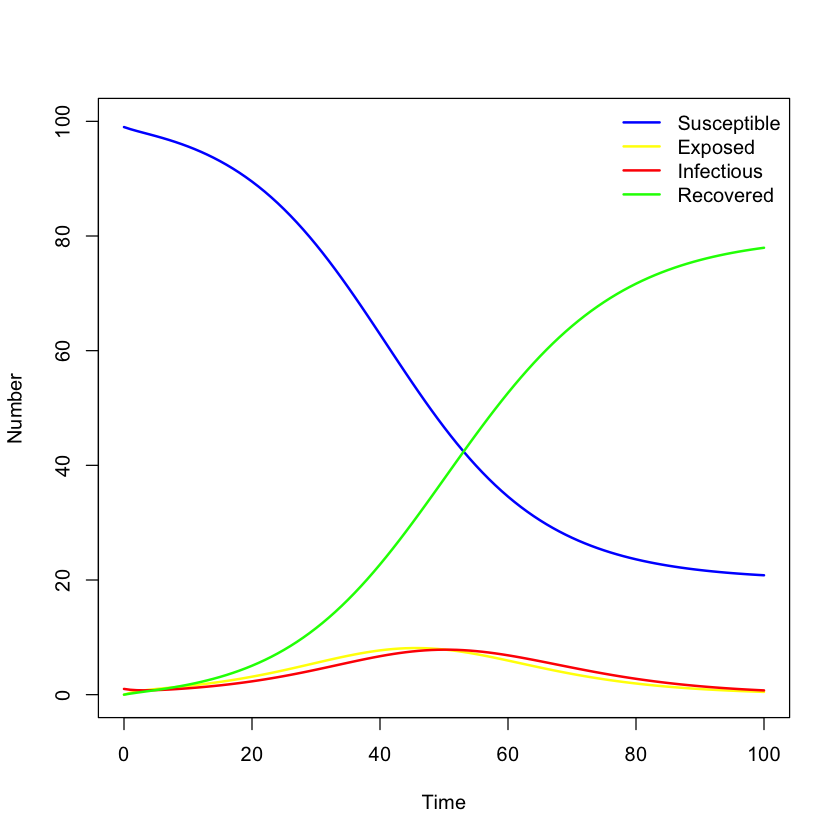

In [9]:
# Plot model output
plot(output$time, output$S, type = "l", col = "blue", lwd = 2, ylim = c(0, N),
      xlab = "Time", ylab = "Number")
lines(output$time, output$E, lwd = 2, col = "yellow", type = "l")
lines(output$time, output$I, lwd = 2, col = "red", type = "l")
lines(output$time, output$R, lwd = 2, col = "green", type = "l")
legend("topright", legend = c("Susceptible", "Exposed", "Infectious", "Recovered"),
       col = c("blue", "yellow", "red", "green"), lwd = 2, bty = "n")

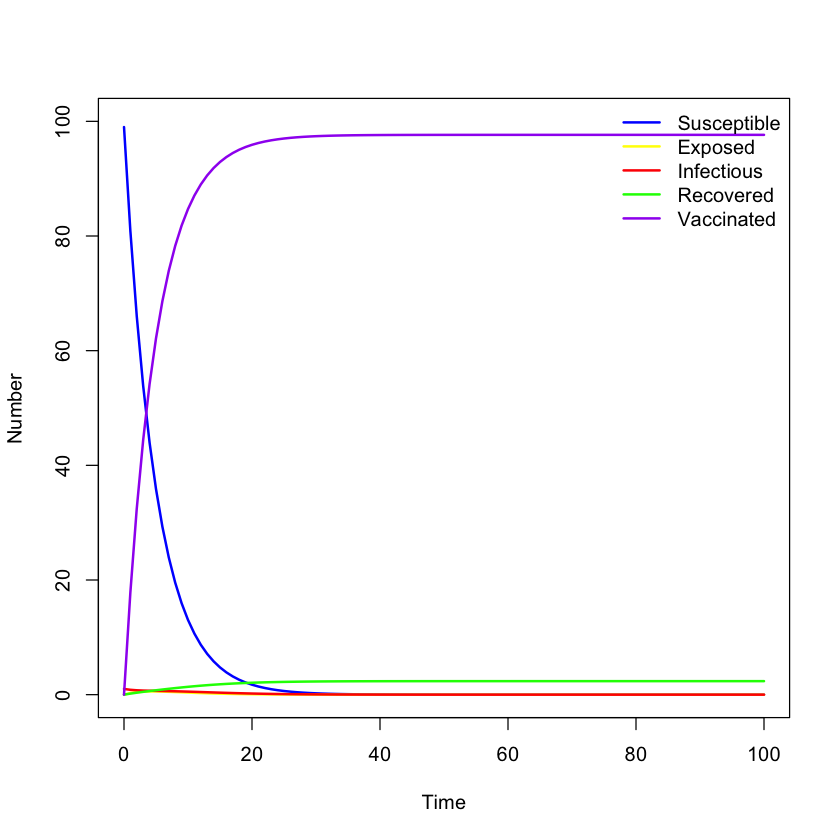

In [12]:
# seirv model
seirv_model <- function(times, state, parms) {
    S <- state["S"]
    E <- state["E"]
    I <- state["I"]
    R <- state["R"]
    V <- state["V"]
    N <- S + E + I + R + V
    
    beta <- parms["beta"]
    delta <- parms["delta"]
    gamma <- parms["gamma"]
    v <- parms["v"]
    
    dS <- -(beta * I / N) * S - v * S
    dE <- (beta * I / N) * S - delta * E
    dI <- delta * E - gamma * I
    dR <- gamma * I
    dV <- v * S
    
    return(list(c(dS, dE, dI, dR, dV)))
}

# Parameter values
parms <- c(beta = 0.4, delta = 0.2, gamma = 0.2, v = 0.2)  # 테스트용 v ↑

# Time steps
times <- seq(from = 0, to = 100, by = 1)

# Initial conditions
N <- 100
E_0 <- 0
I_0 <- 1
R_0 <- 0
V_0 <- 0
S_0 <- N - E_0 - I_0 - R_0 - V_0
y <- c(S = S_0, E = E_0, I = I_0, R = R_0, V = V_0)

# Solve ODE
output_raw <- ode(y = y, times = times, func = seirv_model, parms = parms)
output <- as.data.frame(output_raw)


In [ ]:
# Plot
plot(output$time, output$S, type = "l", col = "blue", lwd = 2, ylim = c(0, N),
     xlab = "Time", ylab = "Number")
lines(output$time, output$E, col = "yellow", lwd = 2)
lines(output$time, output$I, col = "red", lwd = 2)
lines(output$time, output$R, col = "green", lwd = 2)
lines(output$time, output$V, col = "purple", lwd = 2)
legend("topright", legend = c("Susceptible", "Exposed", "Infectious", "Recovered", "Vaccinated"),
       col = c("blue", "yellow", "red", "green", "purple"), lwd = 2, bty = "n")


In [13]:
# sirv model with vaccination start time, coverage, duration

sirv_model <- function(time, state, parameters) {
  with(as.list(c(state, parameters)), {
    
    N <- S + I + R + V
    
    vacc_rate <- ifelse(time >= vaccine_start,
                        vaccine_coverage / vaccine_duration,
                        0)
    
    dS <- -beta * S * I / N - (vacc_rate * vacc_eff) * S
    dI <- beta * S * I / N - gamma * I
    dR <- gamma * I
    dV <- (vacc_rate * vacc_eff) * S
    
    return(list(c(dS, dI, dR, dV)))
  })
}

In [14]:
initial_state <- c(
  S = 99000,
  I = 1000,
  R = 0,
  V = 0
)

times <- seq(0, 180, by = 1)

# different start days
start_days <- c(10, 30, 50, 70)


In [15]:
# for loop
all_outputs <- data.frame()
for(i in start_days) {
  
  parameters <- c(
    beta = 0.3,
    gamma = 1/7,
    vaccine_start = i,
    vaccine_coverage = 0.5,
    vaccine_duration = 14,
    vacc_eff = 0.7
  )
  
  out <- as.data.frame(ode(y = initial_state, times = times, func = sirv_model, parms = parameters))
  
  all_outputs <- rbind(all_outputs, 
                       data.frame(time = out$time,
                                  I = out$I,
                                  vaccine_start = i))
}
all_outputs$type <- "With vaccination"

# bind with pre-vacc
pre_vacc <- df[,c(1,3)]
pre_vacc$vaccine_start <- 0 
pre_vacc$type <- "Without vaccination"
all_outputs <- rbind(pre_vacc, all_outputs)

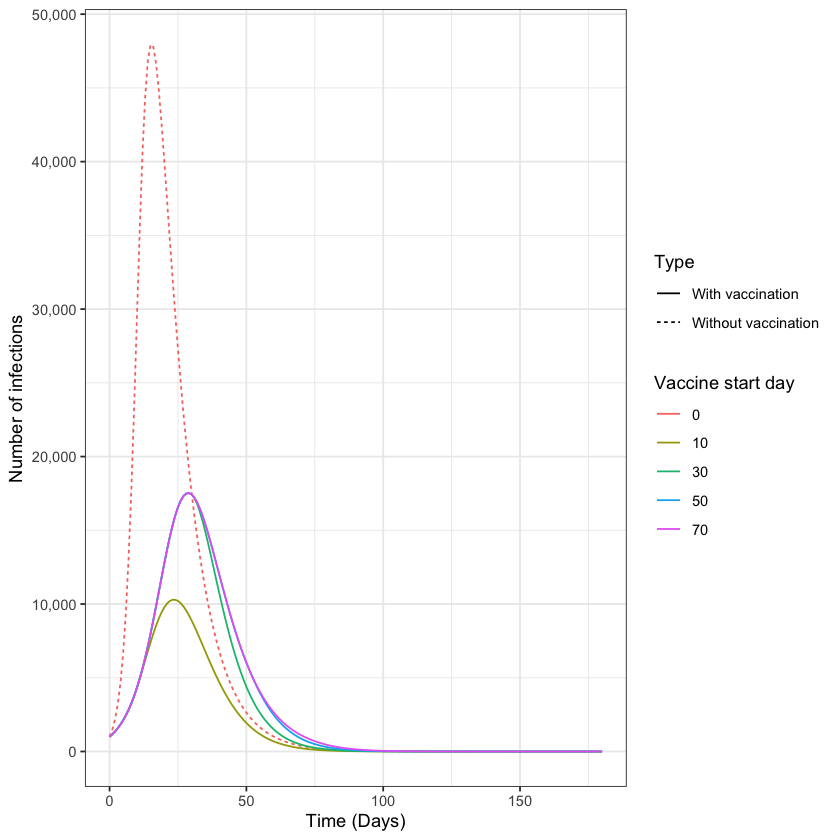

In [16]:
ggplot(all_outputs)+
  geom_line(aes(x = time, y = I, color = as.factor(vaccine_start), linetype = as.factor(type)))+
  theme_bw()+
  labs(color = "Vaccine start day",
      linetype = "Type")+
  scale_y_continuous(labels = comma)+
  xlab("Time (Days)")+
  ylab("Number of infections")

In [17]:
# differnt coverage
vacc_coverage <- c(0.1, 0.3, 0.5, 0.7)

# for loop
all_outputs <- data.frame()
for(vc in vacc_coverage) {
  
  parameters <- c(
    beta = 0.3,
    gamma = 1/7,
    vaccine_start = 10,
    vaccine_coverage = vc,
    vaccine_duration = 14,
    vacc_eff = 0.7
  )
  
  out <- as.data.frame(ode(y = initial_state, times = times, func = sirv_model, parms = parameters))
  
  all_outputs <- rbind(all_outputs, 
                       data.frame(time = out$time,
                                  I = out$I,
                                  vaccine_coverage = vc))
}
all_outputs$type <- "With vaccination"
colnames(pre_vacc)[3] <- "vaccine_coverage"
all_outputs <- rbind(pre_vacc, all_outputs)

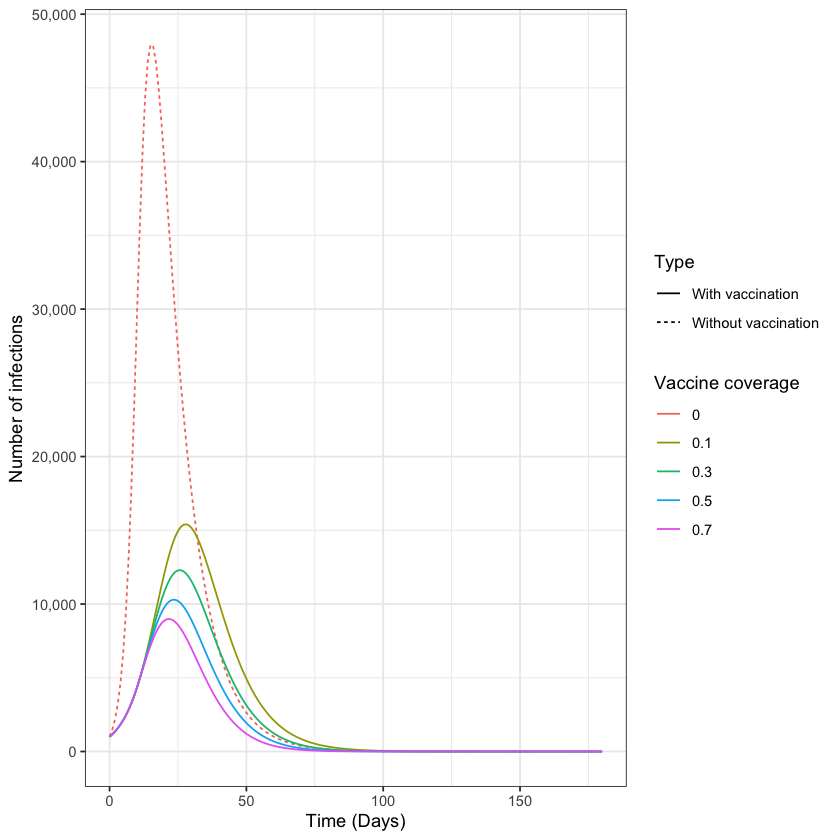

In [18]:
ggplot(all_outputs)+
  geom_line(aes(x = time, y = I, color = as.factor(vaccine_coverage) , linetype = as.factor(type)))+
  theme_bw()+
  scale_y_continuous(labels = comma)+
  labs(color = "Vaccine coverage",
       linetype = "Type") +
  xlab("Time (Days)")+
  ylab("Number of infections")

In [21]:
vacc_eff <- c(0.1, 0.3, 0.5, 0.7, 0.9)

# for loop
all_outputs <- data.frame()
for(ve in vacc_eff) {
  
  parameters <- c(
    beta = 0.3,
    gamma = 1/7,
    vaccine_start = 10,
    vaccine_coverage = 0.5,
    vaccine_duration = 14,
    vacc_eff         = ve
  )
  
  out <- as.data.frame(ode(y = initial_state, times = times, func = sirv_model, parms = parameters))
  
  all_outputs <- rbind(all_outputs, 
                       data.frame(time = out$time,
                                  I = out$I,
                                  vacc_eff = ve))
}
all_outputs$type <- "With vaccination"
colnames(pre_vacc)[3] <- "vacc_eff"
all_outputs <- rbind(pre_vacc, all_outputs)

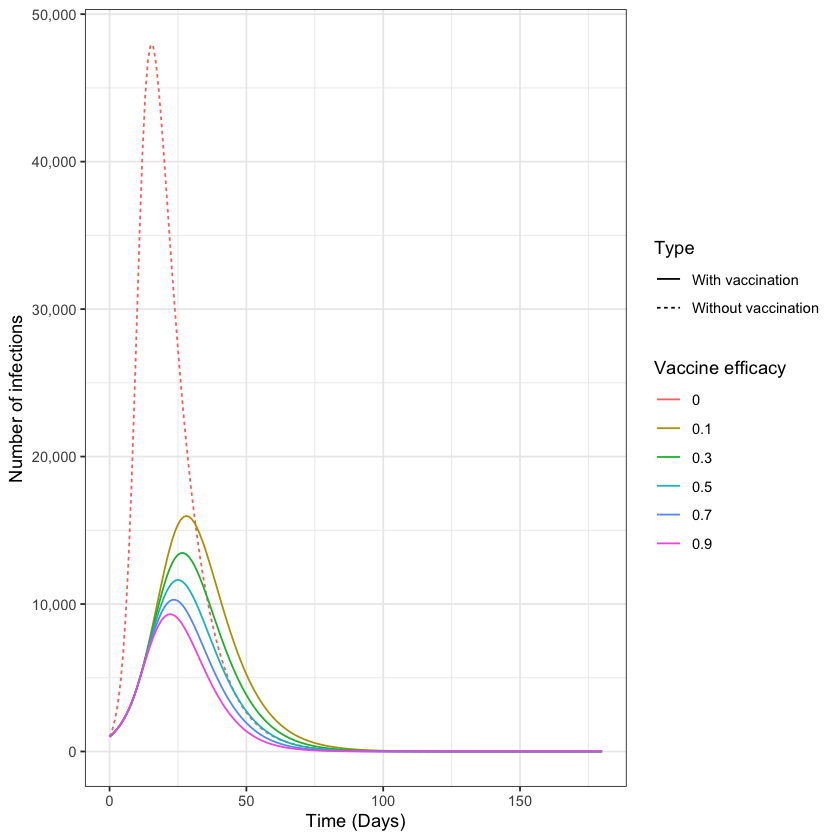

In [22]:
ggplot(all_outputs)+
  geom_line(aes(x = time, y = I, color = as.factor(vacc_eff) , linetype = as.factor(type)))+
  theme_bw()+
  scale_y_continuous(labels = comma)+
  labs(color = "Vaccine efficacy",
       linetype = "Type") +
  xlab("Time (Days)")+
  ylab("Number of infections")